In [1]:
import os.path
import pandas as pd

In [2]:
cwd = os.getcwd()
data_path = os.path.join(cwd, "data-temp", "API_EN.ATM.PM25.MC.ZS_DS2_en_csv_v2_248971.csv")
meta_path = os.path.join(cwd, "data-temp", "Metadata_Country_API_EN.ATM.PM25.MC.ZS_DS2_en_csv_v2_248971.csv")

data_path, meta_path
# !ls data-temp/

('/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/API_EN.ATM.PM25.MC.ZS_DS2_en_csv_v2_248971.csv',
 '/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/Metadata_Country_API_EN.ATM.PM25.MC.ZS_DS2_en_csv_v2_248971.csv')

In [3]:
data_df = pd.read_csv(data_path, skiprows=4)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [4]:
columns_to_drop = set(data_df.columns).difference({"Country Code", "Country Name",
                                                   "1990", "1995", "2000", "2005", "2010", "2011",
                                                   "2012", "2013", "2014", "2015", "2016", "2017"})
data_df.drop(columns=list(columns_to_drop), inplace=True)
data_df.dropna(thresh=5, inplace=True)
data_df

,Country Name,Country Code,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,AFG,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
2,Angola,AGO,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
3,Albania,ALB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
4,Andorra,AND,100.0,99.984211,99.957432,100.0,99.956636,100.0,99.955997,97.685959,16.59898,90.848063,17.419558,17.824459
5,Arab World,ARB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,WSM,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
260,"Yemen, Rep.",YEM,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
261,South Africa,ZAF,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
262,Zambia,ZMB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


In [5]:
meta_df = pd.read_csv(meta_path)
meta_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [6]:
df = pd.merge(data_df, meta_df[["Country Code", "Region", "IncomeGroup"]], how="left")
df

,Country Name,Country Code,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,Region,IncomeGroup
0,Afghanistan,AFG,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,South Asia,Low income
1,Angola,AGO,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,Sub-Saharan Africa,Lower middle income
2,Albania,ALB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,Europe & Central Asia,Upper middle income
3,Andorra,AND,100.0,99.984211,99.957432,100.0,99.956636,100.0,99.955997,97.685959,16.59898,90.848063,17.419558,17.824459,Europe & Central Asia,High income
4,Arab World,ARB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,East Asia & Pacific,Upper middle income
236,"Yemen, Rep.",YEM,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,Middle East & North Africa,Low income
237,South Africa,ZAF,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,Sub-Saharan Africa,Upper middle income
238,Zambia,ZMB,100.0,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,Sub-Saharan Africa,Lower middle income


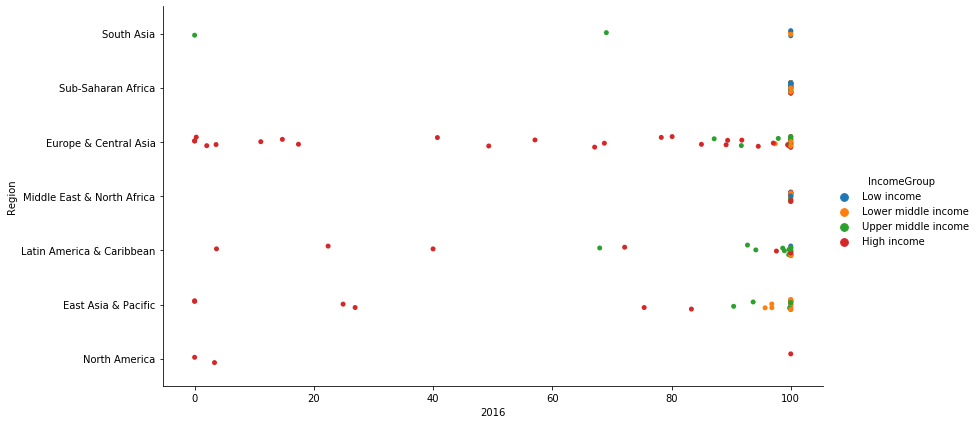

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.catplot(data=df, y="Region", x="2016", hue="IncomeGroup", height=6, aspect=2);